___
# MINIPROJETO 1

## <font color='red'>Daniel Ruhman</font>
___

## <font color='blue'>Gross</font>

___
### Itens 1 a 3 - Resolução:

In [72]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/daniruhman/Dropbox/Insper/Ciencia dos Dados/CD-Daniel Ruhman-Git/Mini Projeto 1


Vamos agora carregar os dados

In [73]:
filmes = pd.read_csv('movie_metadata.csv')
filmes.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## 2) 
Escolhi trabalhar com a variável "gross" que representa a receita dos filmes. Vamos agora limpá-la, removendo valores 0, Nan e valores acima de 100 milhões

In [74]:
filmes_limpo = filmes[(filmes.gross > 0)]
filmes_limpo = filmes_limpo.gross.sort_values()

In [75]:
filmes_limpo.describe()

count    4.159000e+03
mean     4.846841e+07
std      6.845299e+07
min      1.620000e+02
25%      5.340988e+06
50%      2.551750e+07
75%      6.230944e+07
max      7.605058e+08
Name: gross, dtype: float64

## 3)

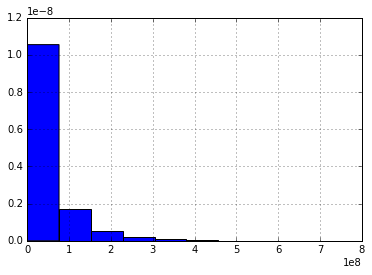

In [76]:
filmes_limpo.hist(normed = True, bins = 10)

___
### Itens 4 a 6 - Resolução:

4) Os dados estão dispostos de maneira assimétrica positiva (Média > Mediana > Moda). A julgar pelo formato, os dados provavelmente podem ser aproximados por uma Gamma ou uma Exponencial, dado que o pico é no começo decaindo quase exponencialmente, depois parece convergir de maneira linear.

In [77]:
media = filmes_limpo.mean()
print(media)

expoFit = stats.expon.fit(filmes_limpo)
gammaFit = stats.gamma.fit(filmes_limpo)
print(expoFit)
print(gammaFit)

48468407.52680933
(161.99999996089443, 48468242.134414643)
(1.0733230593662995, 777404155.33333349, 7.1555555555555106)


## 5 e 6)
Analisando os dados obtidos pela função fit, percebemos que os dados retornados pelo fit() de Gamma estão completamente sem sentido (o segundo valor, que deveria ser a média não bate nem de perto com a média real dos dados), portanto utilizaremos a mesma eurística utilizada pelo professor no arquivo exemplo. Já para a Exponencial os dados retornados por fit() fazem sentido e portanto serão utilizados como parametros para as fdps.

___
### Itens 7 a 9 - Resolução:

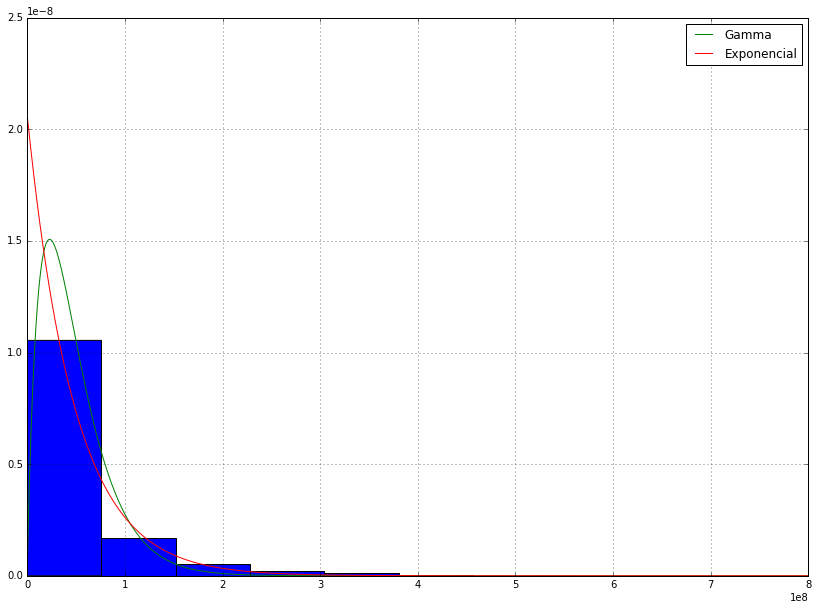

In [78]:
k = 1.9
theta = media/k
x = np.linspace(16000, 800000000, 1000)
fig = plt.figure(figsize=(14,10))
filmes_limpo.hist(normed = True, bins = 10)
exponencial = stats.expon.pdf(x,*expoFit)
gamma = stats.gamma.pdf(x, scale=theta, loc=0, a=k)
#gamma = stats.gamma.pdf(x, *expoFit)
plt.plot(x, gamma, '-', color='green', label="Gamma") # Plota a gamma teórica
plt.plot(x, exponencial, '-', color='red', label="Exponencial") # Plota a exponencial teórica

plt.legend()


KeyError: 4

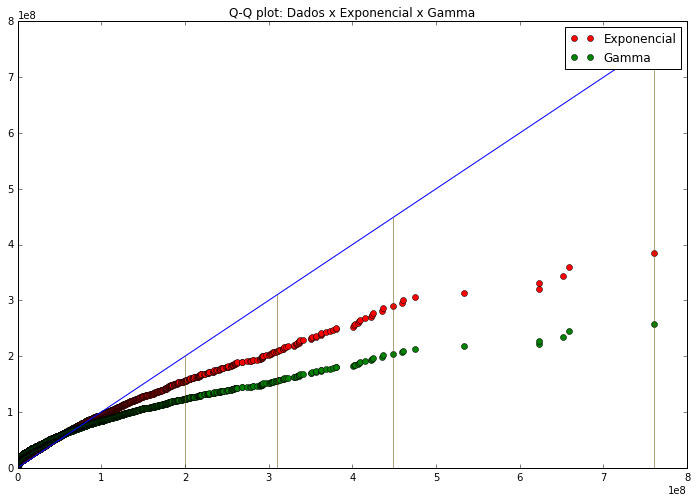

In [83]:
# Calcula a frequência relativa acumulada com os dados vindos dos arquivos
fra = [] # frequencia relativa acumulada
for i in range(len(filmes_limpo)):
    acc = (i - 0.5) / len(filmes_limpo)
    if acc < 0:
        acc = 0
    fra.append(acc) # ver Magalhães e Lima (pag. 195)

# Convertemos fra em uma Series do Pandas
fra = pd.Series(data=fra)

# Gera os valores dos quantis teóricos para as distribuições analisadas
q_exp = stats.expon.ppf(fra, *expoFit) # quantis teóricos da exponencial
q_gamma = stats.gamma.ppf(fra, scale=theta, loc=0, a=k)


fig = plt.figure(figsize=(12,8))

plt.title("Q-Q plot: Dados x Exponencial x Gamma")

exp_plot, = plt.plot(filmes_limpo, q_exp, 'o', color="red", label="Exponencial")
gamma_plot, = plt.plot(filmes_limpo, q_gamma, 'o', color="green", label = "Gamma")

plt.legend(handles=[exp_plot, gamma_plot])
plt.plot((min(filmes_limpo), max(filmes_limpo)), (min(filmes_limpo), max(filmes_limpo)), '-')


for i in range(len(filmes_limpo)):
    plt.plot((filmes_limpo[i], filmes_limpo[i]), (q_exp[i], filmes_limpo[i]), '-', color='red', alpha=0.3  )
    plt.plot((filmes_limpo[i], filmes_limpo[i]), (q_gamma[i], filmes_limpo[i]), '-', color='green', alpha=0.3  )



Analisando o gráfico acima, podemos concluir que a distribuição que melhor aproxima os dados é a exponencial.